# Laboratorio: We are from our childhood

## Descripción
Mediante este trabajo, buscamos encontrar relaciones y correlaciones teniendo en cuenta las respuesta de la encuenta "Crecí en la ciudad” o “Crecí en el campo”.

### Carga de dataset y definición de dependencias


In [1]:
 #%matplotlib notebook
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot

ds = pd.read_csv('./dataset/responses.csv')

# This dataset contains the original name of the columns
column_name = pd.read_csv('./dataset/columns.csv')

### Estadística descriptiva

A continuación, vamos a presentar el desarrollo realizado para el estudio de los distintos estadísticos solicitados, así como el análisis y resultados llegados.

#### Calcular estadísticos como la moda, media, mediana y desviación estándar del peso y de la edad

In [17]:
ds['Weight'].describe().to_frame()

,Weight
count,990.000000
mean,66.405051
std,13.839561
min,41.000000
25%,55.000000
50%,64.000000
75%,75.000000
max,165.000000


In [18]:
ds['Age'].describe().to_frame()

,Age
count,1003.000000
mean,20.433699
std,2.828840
min,15.000000
25%,19.000000
50%,20.000000
75%,22.000000
max,30.000000


#### ¿Responden a una distribución conocida?

Para poder encontrar una respuesta, decidimos disponer los datos en gráficos.

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


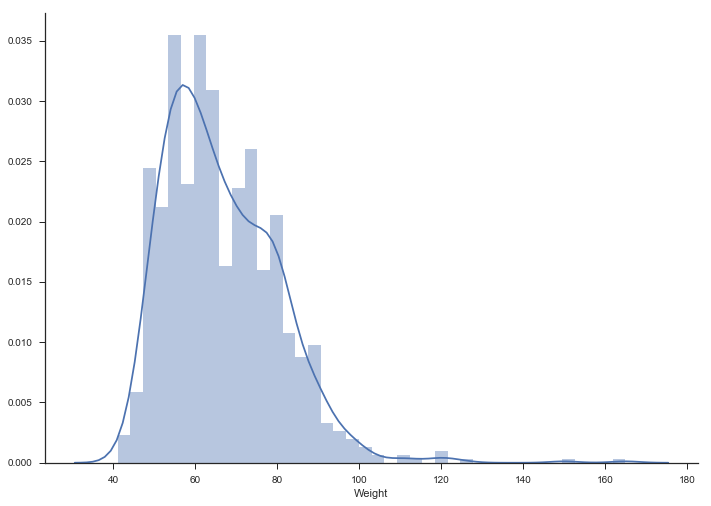

In [19]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

def plot_hist_with_box(data_col, bins):
    x = data_col.dropna()
    sns.set(style="ticks")
    a4_dims = (11.7, 8.27)  
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.distplot(x, ax=ax,  bins=bins, kde=True)


    sns.despine()

plot_hist_with_box(ds['Weight'], 40)

Considerando cómo asciende la curva hasta llegar a un valor cerca de 60 y luego cómo decae produciendo una cola hacia la derecha , la distribución parece tener la forma de una ** chi cuadrada **. Éste último detalle nos hizo descartar desde un principio la posiblidad de que se trate de una normal (no parecen ser outliers los componentes de la cola)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


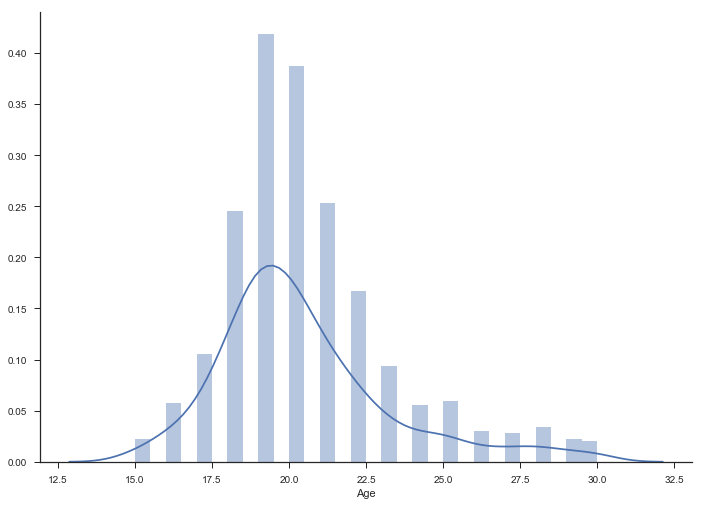

In [20]:
plot_hist_with_box(ds['Age'], 30)

Por su parte, la columna 'Age' parece tener la forma de una distribución ** normal ** con una media ubicada en los 20 años (si consideramos los valores por encima de 25 como outliers que podemos descartar).


### Análisis de outliers

En ésta sección buscamos detectar todos los posibles *outliers* (leves y extremos) filtrando aquellas muestras *s* tales que:

* s > **Q3** + **IRQ** * 1.5 

* s < **Q1** - **IRQ** * 1.5

donde **IQR** es el rango intercuartil (Q3 - Q1)

In [21]:
def get_outlier_candidates(ds,colname):
    Q1 = ds[colname].quantile(0.25)
    Q3 = ds[colname].quantile(0.75)
    IQR = Q3 - Q1
    l = (lambda ds: ds[colname] > 1.5 * IQR + Q3 or ds[colname] < Q1 - 1.5 * IQR)
    return ds[ds.apply(l, axis=1)]

In [22]:
outliers_weight = get_outlier_candidates(ds, 'Weight')
outliers_weight

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
292,5.0,4.0,5.0,2.0,3.0,2.0,5.0,5.0,4.0,1.0,...,21.0,184.0,120.0,1.0,female,right handed,secondary school,no,city,house/bungalow
612,5.0,3.0,5.0,1.0,1.0,3.0,2.0,3.0,4.0,3.0,...,23.0,172.0,110.0,2.0,male,right handed,secondary school,no,village,block of flats
715,4.0,3.0,2.0,3.0,3.0,3.0,4.0,2.0,5.0,5.0,...,29.0,183.0,111.0,1.0,male,left handed,secondary school,no,village,house/bungalow
793,2.0,3.0,3.0,1.0,2.0,3.0,3.0,3.0,2.0,4.0,...,24.0,185.0,120.0,2.0,male,right handed,doctorate degree,no,city,house/bungalow
796,3.0,5.0,3.0,2.0,2.0,4.0,3.0,5.0,1.0,4.0,...,27.0,189.0,113.0,3.0,male,left handed,doctorate degree,no,city,house/bungalow
859,5.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,3.0,2.0,...,20.0,190.0,125.0,1.0,male,right handed,secondary school,no,city,block of flats
885,3.0,4.0,3.0,2.0,2.0,2.0,3.0,4.0,4.0,4.0,...,23.0,NaN,165.0,0.0,female,right handed,secondary school,yes,city,house/bungalow
973,5.0,3.0,2.0,5.0,5.0,4.0,5.0,2.0,5.0,5.0,...,20.0,175.0,120.0,2.0,female,right handed,secondary school,no,city,block of flats
992,4.0,4.0,4.0,1.0,4.0,4.0,1.0,3.0,4.0,4.0,...,30.0,200.0,150.0,1.0,male,right handed,masters degree,no,city,block of flats


In [23]:
ds['Gender'].value_counts().to_frame()

,Gender
female,593
male,411


#### Algunas ideas respecto los datos
Con respecto al peso de los encuestados, encontramos 9 casos cuyo valor podriamos considerar "atipicos leves", o al 
menos así lo indica el análisis usando el rango intercuartil. Dado que una gran mayoría de la población es joven (75% no supera los 22 años), es de esperarse que un peso por encima de los 100 sea realmente poco frecuente. De hecho, el 33% de los casos se corresponden a personas con una edad también atípicamente alta para este conjunto de datos (por encima de los 26 años). 

Por otro lado, podemos obervar que el 67% de los valores atípicos corresponden a personas de género masculino, los cuales suelen tener un peso mayor a las mujeres. Esto también pudo haber influido para que el peso medio se ubique en 66, considerando que el 59 % de los encuestados son de género femenino.

In [24]:
outliers_age = get_outlier_candidates(ds, 'Age')
outliers_age

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
33,5.0,4.0,2.0,2.0,3.0,4.0,5.0,4.0,3.0,1.0,...,27.0,170.0,70.0,1.0,female,right handed,masters degree,no,city,block of flats
45,5.0,4.0,5.0,2.0,2.0,4.0,3.0,5.0,4.0,1.0,...,27.0,181.0,78.0,1.0,male,right handed,masters degree,no,NaN,block of flats
72,5.0,3.0,2.0,2.0,2.0,2.0,5.0,5.0,5.0,2.0,...,28.0,168.0,52.0,1.0,female,right handed,secondary school,no,city,block of flats
186,4.0,2.0,2.0,4.0,2.0,3.0,3.0,4.0,2.0,1.0,...,29.0,169.0,65.0,2.0,female,right handed,masters degree,no,city,block of flats
191,5.0,3.0,2.0,5.0,2.0,4.0,5.0,5.0,2.0,1.0,...,29.0,160.0,67.0,2.0,female,right handed,masters degree,no,village,house/bungalow
215,1.0,3.0,2.0,2.0,1.0,1.0,1.0,3.0,1.0,1.0,...,27.0,180.0,80.0,2.0,male,right handed,secondary school,no,city,block of flats
221,5.0,3.0,4.0,5.0,1.0,4.0,3.0,3.0,5.0,5.0,...,30.0,178.0,71.0,2.0,male,right handed,masters degree,no,city,block of flats
246,5.0,3.0,3.0,2.0,3.0,4.0,1.0,4.0,5.0,2.0,...,27.0,180.0,80.0,0.0,male,right handed,masters degree,yes,city,block of flats
286,5.0,3.0,3.0,2.0,2.0,4.0,3.0,4.0,4.0,1.0,...,27.0,168.0,55.0,1.0,female,right handed,masters degree,no,city,block of flats
343,5.0,4.0,3.0,5.0,2.0,2.0,5.0,5.0,4.0,2.0,...,29.0,168.0,56.0,2.0,female,right handed,masters degree,no,city,block of flats


Con respecto a la edad, es de esperarse que los valores en general no superen los 20-22 años, dado que el conjunto de datos muy posiblemente fue obtenido por los estudiantes del curso de estadística mayoritariamente encuestando a otros estudiantes, es decir a individuos dentro de un rango de edad acotado. Esto podría explicar el hecho de que valores por encima de 26 años resulten en candidatos a outliers.

#### Explicar cómo varían las métricas cuando desglosamos por género

In [26]:
m = ds[ds.apply((lambda s: s['Gender'] == 'male'), axis=1)]
f = ds[ds.apply((lambda s: s['Gender'] == 'female'), axis=1)]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


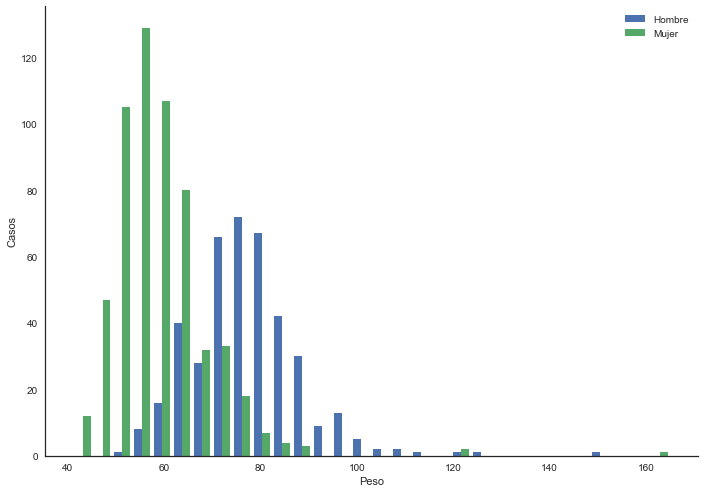

In [27]:
def multi_hist_plot(data_col1, data_col2, bins, labels, ylabel):
    sns.set_style("white")
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    ax.hist([data_col1, data_col2], bins, label=labels)
    ax.set_xlabel(ylabel)
    ax.set_ylabel('Casos')
    ax.legend()
    sns.despine()
    plt.show()


multi_hist_plot(m['Weight'].dropna(), f['Weight'].dropna(), 30, ['Hombre','Mujer'], 'Peso')


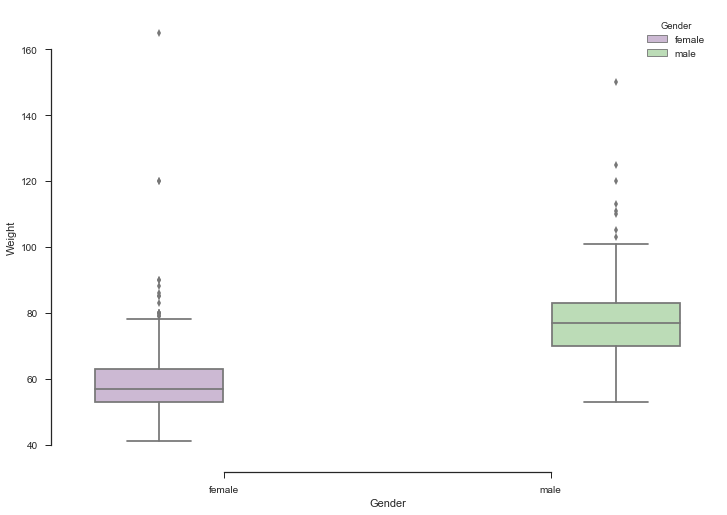

In [28]:
def plot_box(ds, col):
    sns.set(style="ticks")
    a4_dims = (11.7, 8.27)
    fig, ax = pyplot.subplots(figsize=a4_dims)
    sns.boxplot(y=col, x='Gender', hue="Gender", data=ds, palette="PRGn", ax=ax)
    sns.despine(offset=10, trim=True)

plot_box(ds,'Weight')

Si hacemos un análisis del peso según el género, vemos que para ambos casos se podría considerad que la distribución tiene una forma semejante a la chi cuadrada. 

Una de las diferencia mayores entre ambos géneros radica es que la media para la población masculina es mayor, lo que produce que en el histograma se ubique a la derecha del correspondiente a las mujeres.
Con la mediana ocurre algo similar, y se puede ver en el boxplot valores por encima de 120 son claros candidatos a outliers en el caso de las mujeres, mientras que en los hombres podríamos considerar como tales a partir de 140.


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


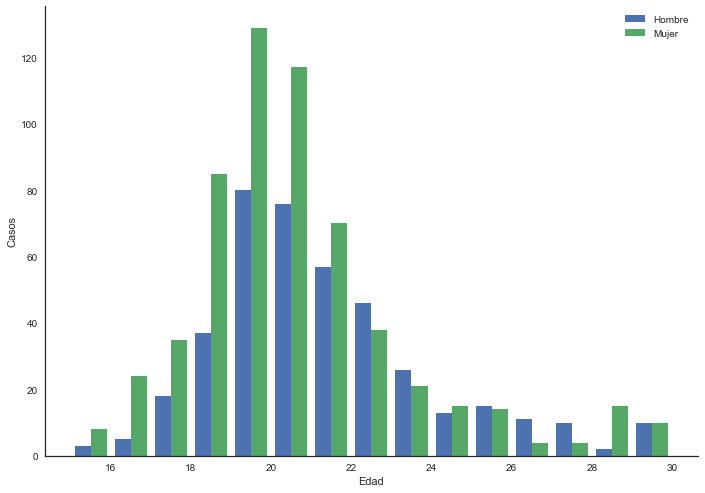

In [29]:
multi_hist_plot(m['Age'].dropna(), f['Age'].dropna(), 15, ['Hombre','Mujer'], 'Edad')


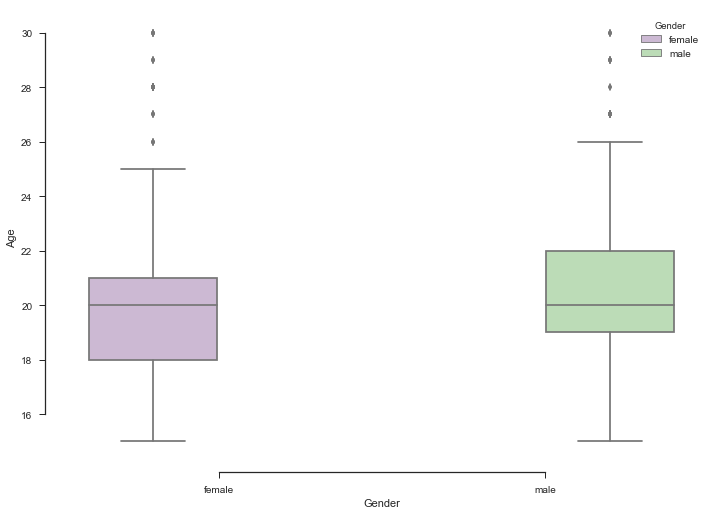

In [30]:
plot_box(ds,'Age')

In [31]:
m['Age'].describe().to_frame()

,Age
count,409.000000
mean,20.872861
std,2.796789
min,15.000000
25%,19.000000
50%,20.000000
75%,22.000000
max,30.000000


In [32]:
f['Age'].describe().to_frame()

,Age
count,589.000000
mean,20.113752
std,2.792537
min,15.000000
25%,18.000000
50%,20.000000
75%,21.000000
max,30.000000


Por otro lado, cuando desglosamos la información de las edades según el género del individuo, vemos que ambas distribuciones son en realidad muy similares y prácticamente se superponen. Esto es esperable ya que no debería depender del género el rango de edades de los encuestados (sino que más bien depende del entorno donde se realizó, por ejemplo la universidad). En efecto, la mediana coincide en ambos casos, y la media y la desviación estándar son muy similares.

En el histograma se puede apreciar más altura del gráfico correspondiente al género femenino debido a que en la muestra hay más mujeres que hombres (59%). 

En nuestra consideración, ambas distribuciones se asemejan a una normal.


### Correlación entre las variables

En ésta sección analizamos la correlación entre peso y edad en hombres y mujeres calculando el coeficiente *Pearson*.
Luego, graficamos ambos casos en un mismo gráfico de dispersión.

In [34]:
m['Age'].corr(m['Weight'], method='pearson')

0.25351410559693754

In [35]:
f['Age'].corr(f['Weight'], method='pearson')

0.15647661430936238

El cálculo del coeficiente *Pearson* en ambos casos nos sugiere que no existe una correlación (lineal) entre peso y edad, al ubicarse ambos índices más cercano al 0 que a 1 o -1.

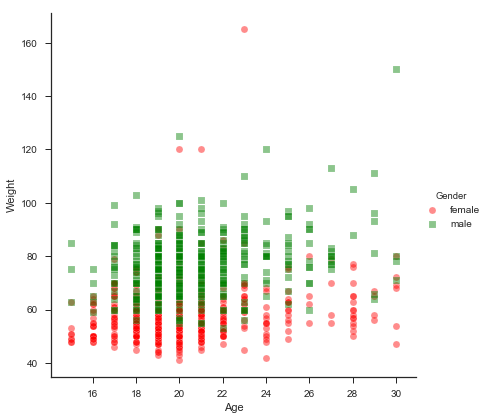

In [36]:

sns.set(style="ticks", color_codes=True)
sns.pairplot(ds, hue="Gender", x_vars=['Age'], y_vars=['Weight'], markers=["o", "s"], palette={'male':'green', 'female': 'red'}, plot_kws={'alpha':0.45}, size=6)

#### Conclusión

Tal como nos habían sugerido los resultados del coeficiente Pearson, en la gráfica podemos apreciar para ambos géneros que no hay una correlación lineal clara entre edad y peso.

De hecho, en el gráfico de dispersión podemos observar que no sólo no las muestras no se agrupan de una manera en que se pueda apreciar una linea o franja, sino que tampoco forman otro patrón (un círculo, por ejemplo). Por el contrario, las muestras para ambos géneros están mucho más cerca de formar una "nube" que alguna otra forma o patrón, lo que indica visualmente que no habría correlación entre ambas variables.

Si se pudiera determinar que ciertos pesos elevados son efectivamente *outliers* y se quitaran esas muestras, la gráfica mostraria una franja un poco más definida.

### Calculo de probabilidad marginal y conjunta

Ambos conceptos se encuentran relacionados al de Probabilidad Condicional.

* La probabilidad conjunta está definida por P(A∩B), es decir la probabilidad que ocurra en simultaneo dos eventos. 
* La probabilidad marginal, se define como la suma de las probabilidades conjuntas de un solo evento.

Las variables aleatorias que vamos a trabajar son:

* A = Tabaquismo en gente jóven
* B = Consumo de alcohol en gente jóven

In [2]:
# Paso intermedio, para poder averigar la cantidad de columnas y los nombres de las mismas para poder empezar a trabajar.
#dataset.columns.size
#list(ds.columns.values)

# Primera forma que se encontró para visualizar las probabilidades conjuntas y marginales.
# La misma no resultó útil ya que no era fácil de interpretar a simple vista.
#(ds.groupby('Smoking')['Alcohol'].value_counts() / ds.groupby('Smoking')['Alcohol'].count()).to_frame()

In [66]:
# A continuación se presentan definidas por medio de una tabla, las probabilidades conjuntas y marginales.
# Incluimos a la hora de crear la tabla, el parámetro de normalización, para visualizar las probabilidades,
# y no las frecuencias en la misma.

pd.crosstab(index=ds['Alcohol'],
            columns=ds['Smoking'], 
            margins=True,
            normalize=True)

Smoking,current smoker,former smoker,never smoked,tried smoking,All
Alcohol,,,,,
drink a lot,0.078,0.055,0.015,0.072,0.220
never,0.011,0.011,0.061,0.039,0.122
social drinker,0.099,0.109,0.131,0.319,0.658
All,0.188,0.175,0.207,0.430,1.000


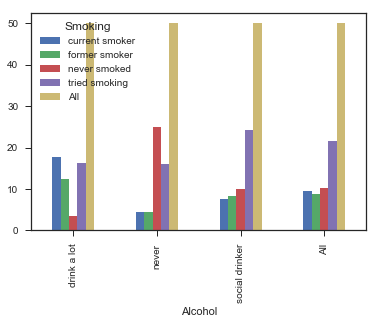

In [67]:
ds.dropna()
plot = pd.crosstab(index=ds['Alcohol'],
            columns=ds['Smoking'], 
            margins=True,
            ).apply(lambda r: r/r.sum() *100,axis=1).plot(kind='bar')

#### ¿Qué pasaría con los niveles de tabaquismo si se prohíbe fumar en los bares? 

Siendo la probabilidad conjunta de un bebedor social, y un alguien que prueba fumar aproximadamente de ~32%, entonces se reduciría los niveles de tabaquismo.  

#### ¿Qué pasaría con la cantidad de consumidores de alcohol si disminuye la cantidad de fumadores que consumen alcohol?

Siendo la siguientes probabilidades conjuntas:
* Fumador actual y bebe mucho alcohol:~8%
* Fumador actual y bebedor social:~10%

Si sumamos ambas probabilidades repersentan ~18% de fumadores que consumen alcohol. Si se sustrajera este grupo, no influiría significativamente a aquellas personas que consumen alcohol y utilizan tabaco de forma ocasional o han fumado.